In this notebook, we'll look at featurizing fatigue to see if we can get lift on our models through this.
The Sipko paper indicates that fatigue can be featurized by:

* Number of matches played in last 3 days
* Indicator for whether this is the first match back after retiring from one 

In [1]:
from fetch.match_results import read_joined 

df, player_mapping, inverse_player_mapping = read_joined()

/Users/siddhantjagadish/Documents/DataProjects/tennis_modeling/tennis_modeling/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2818: DtypeWarning: Columns (14,30) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [2]:
# Before 2003, no distinction in date between matches
df = df[df['date'] >= '2003-01-01'].copy()

In [3]:
df.sort(['date', 'round'], inplace=True)

/Users/siddhantjagadish/Documents/DataProjects/tennis_modeling/tennis_modeling/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


#### Retirement
Let's look at whether people who retired in their last match actually do worse

In [4]:
import numpy as np
import pandas as pd

def featurize_player(player):
    print "Featurizing %s..." % player
    player_df = df[
        (df['loser'] == player) |
        (df['winner'] == player)
    ].copy()

    player_df['last_retired'] = (
        (player_df['loser'] == player) &
        (player_df['comment'] == 'Retired')
    ).astype(int).shift(1)
    player_df['last_retired'].fillna(0, inplace=True)
    player_df.index = pd.to_datetime(player_df['date'])

    player_df['__count__'] = 1
    player_df['fatigue_matches'] = player_df.rolling('3d')['__count__'].sum() - 1
    player_df['fatigue_matches'] = player_df['fatigue_matches'].clip(lower=0.)

    # Subtract current games because rolling sum includes them...
    player_df['fatigue_games'] = player_df.rolling('3d')['total_games'].sum() - player_df['total_games']
    
    player_df['player'] = player
    player_df['time_since_last_match'] = player_df['date'].diff().map(
        lambda x: np.nan if pd.isnull(x) else x.days
    ).astype(float)

    return player_df[[
        'player',
        'match_id',
        'last_retired',
        'fatigue_matches',
        'fatigue_games',
        'time_since_last_match'
    ]]

In [5]:
all_players = sorted(set(df['winner']) | set(df['loser']))
player_dfs = [
    featurize_player(p) for p in all_players
]

Featurizing Abdulla M....
Featurizing Abel M....
Featurizing Acasuso J....
Featurizing Adaktusson J....
Featurizing Agassi A....
Featurizing Ager J....
Featurizing Agostinelli B....
Featurizing Aguilar J....
Featurizing Ahouda A....
Featurizing Al Ghareeb M....
Featurizing Al Mutawa J....
Featurizing Al-Ghareeb M....
Featurizing Alawadhi O....
Featurizing Albot R....
Featurizing Alcaide G....
Featurizing Aldi F....
Featurizing Ali Mutawa J.M....
Featurizing Allegro Y....
Featurizing Almagro N....
Featurizing Altamirano C....
Featurizing Altmaier D....
Featurizing Alund M....
Featurizing Alves T....
Featurizing Amritraj P....
Featurizing Ancic I....
Featurizing Ancic M....
Featurizing Andersen J....
Featurizing Andersen J.F....
Featurizing Anderson A....
Featurizing Anderson K....
Featurizing Anderson O....
Featurizing Andersson H....
Featurizing Andreev A....
Featurizing Andreev I....
Featurizing Andreozzi G....
Featurizing Androic T....
Featurizing Andujar P....
Featurizing Aragone J.

Featurizing Fleishman Z....
Featurizing Fleming C....
Featurizing Fognini F....
Featurizing Fogues F....
Featurizing Fornell M....
Featurizing Fraile G....
Featurizing Fratangelo B....
Featurizing Friedl L....
Featurizing Fritz T....
Featurizing Fruttero J.P....
Featurizing Fucsovics M....
Featurizing Furlan R....
Featurizing Fyrstenberg M....
Featurizing Gabashvili T....
Featurizing Gaio F....
Featurizing Galan D.E....
Featurizing Galdon P....
Featurizing Galimberti G....
Featurizing Gallardo M....
Featurizing Gallardo Valles M....
Featurizing Galovic V....
Featurizing Galvani S....
Featurizing Gambill J. M....
Featurizing Gambill J.M....
Featurizing Gamonal H....
Featurizing Garcia A....
Featurizing Garcia-Lopez G....
Featurizing Gard C....
Featurizing Garin C....
Featurizing Garza D....
Featurizing Gasquet R....
Featurizing Gaston H....
Featurizing Gaudenzi A....
Featurizing Gaudio G....
Featurizing Gensse A....
Featurizing Ghedin R....
Featurizing Ghem A....
Featurizing Giannessi A

Featurizing Mager G....
Featurizing Mahut N....
Featurizing Majchrzak K....
Featurizing Malisse X....
Featurizing Mamiit C....
Featurizing Mankad H....
Featurizing Mannarino A....
Featurizing Mantilla F....
Featurizing Marach O....
Featurizing Marcaccio G....
Featurizing Marcan D....
Featurizing March O....
Featurizing Marchenko I....
Featurizing Marcora R....
Featurizing Marin J.A...
Featurizing Marin J.A....
Featurizing Marrai M....
Featurizing Marray J....
Featurizing Marrero D....
Featurizing Marterer M....
Featurizing Marti J....
Featurizing Marti Y....
Featurizing Martin A....
Featurizing Martin F....
Featurizing Martin T....
Featurizing Martinez P....
Featurizing Massa E....
Featurizing Massu N....
Featurizing Masur D....
Featurizing Mathieu P....
Featurizing Mathieu P.H....
Featurizing Matkowski M....
Featurizing Matos-Gil I....
Featurizing Matosevic M....
Featurizing Matsui T....
Featurizing Matsukevitch D....
Featurizing Mayer F....
Featurizing Mayer L....
Featurizing Mazarak

Featurizing Sela D....
Featurizing Seppi A....
Featurizing Serdarusic N....
Featurizing Sergeyev I....
Featurizing Serra F....
Featurizing Serrano O....
Featurizing Setkic A....
Featurizing Settergren J....
Featurizing Seyboth Wild T....
Featurizing Shane R....
Featurizing Shapovalov D....
Featurizing Sherwood D....
Featurizing Shimada T....
Featurizing Shyla Y....
Featurizing Si Y.M....
Featurizing Sidorenko A....
Featurizing Sijsling I....
Featurizing Silva D....
Featurizing Silva F....
Featurizing Silva F.F....
Featurizing Silva J....
Featurizing Simmonds P....
Featurizing Simon G....
Featurizing Simonsson F....
Featurizing Singh N....
Featurizing Singh S....
Featurizing Sirianni J....
Featurizing Siriluethaiwattana P....
Featurizing Sitak A....
Featurizing Skoch D....
Featurizing Skugor F....
Featurizing Slabinsky A....
Featurizing Slanar M....
Featurizing Sluiter R....
Featurizing Smeets R....
Featurizing Smethurst D....
Featurizing Smith A....
Featurizing Smith J.P....
Featurizin

In [6]:
player_feats = pd.concat(player_dfs)
assert player_feats.shape[0] == df.shape[0] * 2

In [7]:
# Merge in player feats
feats = [col for col in player_feats.columns if col not in ('match_id', 'player')]
df = pd.merge(
    df,
    player_feats,
    left_on=['match_id', 'p1'],
    right_on=['match_id', 'player']
)
df.rename(columns={f: 'p1_%s' % f for f in feats}, inplace=True)
df = pd.merge(
    df,
    player_feats,
    left_on=['match_id', 'p2'],
    right_on=['match_id', 'player']
)
df.rename(columns={f: 'p2_%s' % f for f in feats}, inplace=True)

In [8]:
assert df['p1_fatigue_matches'].isnull().sum() == 0
assert df['p2_fatigue_matches'].isnull().sum() == 0

In [9]:
df['fatigue_diff'] = df['p1_fatigue_matches'] - df['p2_fatigue_matches']
df.groupby('fatigue_diff').apply(
    lambda x: (x.shape[0], x['y'].mean())
)

fatigue_diff
-4.0                   (1, 0.0)
-3.0                   (1, 1.0)
-2.0      (123, 0.463414634146)
-1.0      (4171, 0.56988731719)
 0.0    (29814, 0.503656000537)
 1.0     (4178, 0.459789372906)
 2.0      (146, 0.541095890411)
 3.0                   (1, 0.0)
 4.0                   (1, 1.0)
dtype: object

In [10]:
df['time_diff'] = df['p1_time_since_last_match'] - df['p2_time_since_last_match']

out = []
for td in range(100):
    d1 = df[df['time_diff'] > td]['y'].mean()
    d2 = 1. - df[df['time_diff'] < -td]['y'].mean()
    out.append((d1 + d2) / 2.)

In [11]:
out

[0.46890839127183481,
 0.46525433944069433,
 0.46616076902155501,
 0.46465369122267269,
 0.4596727964512648,
 0.45599439200914621,
 0.4503564481986374,
 0.44646084384052787,
 0.44062611641787708,
 0.43786421633974482,
 0.43491810565828282,
 0.43044819248985133,
 0.42696396149506133,
 0.42216674576343055,
 0.41950538245235319,
 0.41608765424905264,
 0.41239067380209249,
 0.40944767234989699,
 0.40309228937218777,
 0.39937152292173628,
 0.39718453587575969,
 0.3933280371594865,
 0.39154019813595309,
 0.38750939887681046,
 0.38516158500796077,
 0.38277567878717356,
 0.38176349328347381,
 0.37964222237209388,
 0.37518763281791179,
 0.37304276927652658,
 0.37128677277509103,
 0.36912375767003713,
 0.36839778442664267,
 0.36702731969812324,
 0.36539832119100413,
 0.36346962844081315,
 0.36216929578022744,
 0.36019005921924235,
 0.3588798926671426,
 0.35795776293364123,
 0.35845599982958054,
 0.35835495964831388,
 0.3566688416199052,
 0.35515060580300906,
 0.35456777787727822,
 0.352156768066

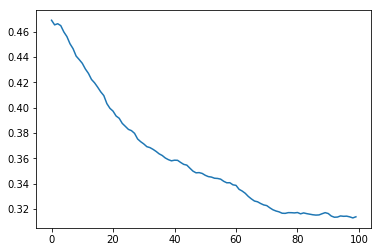

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(out)

In [13]:
def investigate_row(row):
    p1 = row['p1']
    p2 = row['p2']
    return df[
        # (df['tournament'] == row['tournament']) &
        (df['date'] < '2004-01-01') &
        (
            (df['winner'].map(lambda x: x in (p1, p2))) | 
            (df['loser'].map(lambda x: x in (p1, p2)))
        )
    ][['tournament', 'round', 'date', 'p1', 'p2', 'winner', 'loser', 'p1_fatigue_matches', 'p2_fatigue_matches']]

#### Try Model with New Features

In [14]:
MIN_TRAIN_DATE = '2004-01-01'
MIN_TEST_DATE = '2016-01-01'
MAX_TEST_DATE = '2017-01-01'

train_df = df[
    (df['date'] >= MIN_TRAIN_DATE) &
    (df['date'] < MIN_TEST_DATE)
].copy()
test_df = df[
    (df['date'] >= MIN_TEST_DATE) &
    (df['date'] < MAX_TEST_DATE) &
    (df['__surface__'] == 'Hard') &
    (~df['comment'].isin(['Retired', 'Walkover']))
].copy()

In [15]:
from models.logit.base import get_X_y

orig_train_X, orig_train_y = get_X_y(train_df, player_mapping)
orig_test_X, orig_test_y = get_X_y(test_df, player_mapping)

##### Old Model with No Additional Features

In [16]:
from models.logit.base import sipko_weights

DISCOUNT = 0.8
FLAT_TIME = 1.0
PRIOR = 0.
LMBDA = 1.

time_weights = sipko_weights(
    train_df['date'].max(),
    train_df,
    DISCOUNT,
    flat_time=FLAT_TIME
)
surface_weights = train_df['__surface__'].map(
    lambda x: {
        'Hard': 1.0,
        'Clay': 0.8,
        'Grass': 1.0,
        'Indoor': 1.0 
    }[x]
)
sample_weights = time_weights * surface_weights

In [17]:
from ml.prior_logit import NonZeroLogit

orig_nzl = NonZeroLogit(prior=PRIOR, lmbda=LMBDA, seed=10)
orig_nzl.fit(orig_train_X, orig_train_y, sample_weight=sample_weights)

In [18]:
from sklearn.metrics import roc_auc_score

preds = orig_nzl.predict_proba(orig_test_X)[:, 1]
orig_auc = roc_auc_score(orig_test_y, preds)
orig_auc

0.7434927749875726

In [19]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=0.4)
logit.fit(orig_train_X, orig_train_y, sample_weight=sample_weights)
preds = logit.predict_proba(orig_test_X)[:, 1]
orig_auc = roc_auc_score(orig_test_y, preds)
orig_auc

0.7435056308815714

In [20]:
train_preds = logit.predict_proba(orig_train_X)[:, 1]
roc_auc_score(orig_train_y, train_preds)

0.74348216969722514

##### Now let's add some additional features

In [21]:
df['time_diff'] = df['p1_time_since_last_match'] - df['p2_time_since_last_match']
# df['p1_comeback'] = (df['p1_time_since_last_match'] > 5).map(int)
# df['p2_comeback'] = (df['p2_time_since_last_match'] > 5).map(int)
df['p1_comeback'] = (df['time_diff'] > 5).map(int)
df['p2_comeback'] = (df['time_diff'] < -5).map(int)
df['comeback_diff'] = (df['p1_comeback'] - df['p2_comeback'])
df['fatigue_diff'] = df['p1_fatigue_games'] - df['p2_fatigue_games']
df['retire_diff'] = df['p1_last_retired'] - df['p2_last_retired']

In [22]:
df['time_diff'].fillna(0, inplace=True)

In [23]:
MIN_TRAIN_DATE = '2004-01-01'
MIN_TEST_DATE = '2016-01-01'
MAX_TEST_DATE = '2017-01-01'

train_df = df[
    (df['date'] >= MIN_TRAIN_DATE) &
    (df['date'] < MIN_TEST_DATE)
].copy()
test_df = df[
    (df['date'] >= MIN_TEST_DATE) &
    (df['date'] < MAX_TEST_DATE) &
    (df['__surface__'] == 'Hard') &
    (~df['comment'].isin(['Retired', 'Walkover']))
].copy()

In [24]:
from models.logit.base import get_X_y

orig_train_X, orig_train_y = get_X_y(train_df, player_mapping)
orig_test_X, orig_test_y = get_X_y(test_df, player_mapping)

In [25]:
from scipy import sparse

NEW_FEATS = [
    'comeback_diff',
    'fatigue_diff',
]
new_train_X = sparse.hstack([
    orig_train_X,
    sparse.csc_matrix(train_df[NEW_FEATS].values)
])
new_test_X = sparse.hstack([
    orig_test_X,
    sparse.csc_matrix(test_df[NEW_FEATS].values)
])

In [26]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=0.4)
logit.fit(new_train_X, orig_train_y, sample_weight=sample_weights)
logit.coef_

array([[-0.14761828,  0.        ,  2.93443943, ...,  0.        ,
        -0.20648034, -0.006222  ]])

In [27]:
logit.coef_[0][-2:]

array([-0.20648034, -0.006222  ])

In [28]:
train_preds = logit.predict_proba(new_train_X)[:, 1]
train_auc = roc_auc_score(orig_train_y, train_preds)
train_auc

0.74512056022807427

In [29]:
_preds = logit.predict_proba(new_test_X)[:, 1]
roc_auc_score(orig_test_y, _preds)

0.75053566224995283

In [ ]:
# TODO: Get AUC for odds

#### How much variance does NZL fit have!?  Looks like quite a bit!!!

In [ ]:
def fit_nzl():
    nzl = NonZeroLogit(lmbda=0.)
    nzl.fit(new_train_X, orig_train_y)
    _preds = nzl.predict_proba(new_test_X)[:, 1]
    return roc_auc_score(orig_test_y, _preds)

In [ ]:
aucs = [fit_nzl() for _ in range(100)]

In [ ]:
pd.Series(aucs).describe(percentiles=np.linspace(0, 1, 11))

In [ ]:
aucs[0]